In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

663

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e462d0603aa631588b3bcd178ae4e81


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | tiarei
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | mildura
Processing Record 5 of Set 1 | ayan
Processing Record 6 of Set 1 | tuatapere
Processing Record 7 of Set 1 | honiara
Processing Record 8 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | houma
Processing Record 13 of Set 1 | eskasem
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | olavarria
Processing Record 16 of Set 1 | acarau
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | hearst
Processing Record 19 of Set 1 | port-cartier
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 1 | 

Processing Record 37 of Set 4 | nishihara
Processing Record 38 of Set 4 | vila velha
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | anar darreh
City not found. Skipping...
Processing Record 41 of Set 4 | boende
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | quedlinburg
Processing Record 44 of Set 4 | sahrak
City not found. Skipping...
Processing Record 45 of Set 4 | jamestown
Processing Record 46 of Set 4 | rio grande
Processing Record 47 of Set 4 | barawe
City not found. Skipping...
Processing Record 48 of Set 4 | mehamn
Processing Record 49 of Set 4 | coihaique
Processing Record 50 of Set 4 | lufilufi
Processing Record 1 of Set 5 | lerwick
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | barrow
Processing Record 4 of Set 5 | pasni
Processing Record 5 of Set 5 | tateyama
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | kurilsk
Processing Record 8 of Set 5 | paratinga
Processing Record

Processing Record 25 of Set 8 | fergus falls
Processing Record 26 of Set 8 | aranos
Processing Record 27 of Set 8 | paramonga
Processing Record 28 of Set 8 | bandarbeyla
Processing Record 29 of Set 8 | ponta do sol
Processing Record 30 of Set 8 | hualmay
Processing Record 31 of Set 8 | monrovia
Processing Record 32 of Set 8 | hohhot
Processing Record 33 of Set 8 | hamilton
Processing Record 34 of Set 8 | abiramam
Processing Record 35 of Set 8 | leh
Processing Record 36 of Set 8 | kurchum
Processing Record 37 of Set 8 | haverfordwest
Processing Record 38 of Set 8 | nancha
Processing Record 39 of Set 8 | brownsville
Processing Record 40 of Set 8 | ozernovskiy
Processing Record 41 of Set 8 | kavaratti
Processing Record 42 of Set 8 | mizque
Processing Record 43 of Set 8 | tutoia
Processing Record 44 of Set 8 | pevek
Processing Record 45 of Set 8 | longlac
City not found. Skipping...
Processing Record 46 of Set 8 | ulaangom
Processing Record 47 of Set 8 | baykit
Processing Record 48 of Set 

Processing Record 14 of Set 12 | qaqortoq
Processing Record 15 of Set 12 | tomatlan
Processing Record 16 of Set 12 | yelizovo
Processing Record 17 of Set 12 | tyulyachi
Processing Record 18 of Set 12 | karratha
Processing Record 19 of Set 12 | wajima
Processing Record 20 of Set 12 | srostki
Processing Record 21 of Set 12 | bullhead city
Processing Record 22 of Set 12 | menongue
Processing Record 23 of Set 12 | micheweni
Processing Record 24 of Set 12 | teguldet
Processing Record 25 of Set 12 | khonsa
Processing Record 26 of Set 12 | dingle
Processing Record 27 of Set 12 | tazovskiy
Processing Record 28 of Set 12 | penarroya-pueblonuevo
Processing Record 29 of Set 12 | tamandare
Processing Record 30 of Set 12 | san juan del sur
Processing Record 31 of Set 12 | tungor
Processing Record 32 of Set 12 | guelengdeng
City not found. Skipping...
Processing Record 33 of Set 12 | orahovac
Processing Record 34 of Set 12 | nyurba
Processing Record 35 of Set 12 | hagerstown
Processing Record 36 of 

In [10]:
len(city_data)

608

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,28.81,62,100,1.83,GL,2021-09-17 21:38:51
1,Tiarei,-17.5333,-149.3333,77.38,77,25,23.80,PF,2021-09-17 21:42:35
2,Tuktoyaktuk,69.4541,-133.0374,47.05,71,99,6.44,CA,2021-09-17 21:39:10
3,Mildura,-34.2000,142.1500,51.08,71,0,15.66,AU,2021-09-17 21:42:36
4,Ayan,56.4500,138.1667,47.95,62,5,5.06,RU,2021-09-17 21:42:36
5,Tuatapere,-46.1333,167.6833,42.82,61,6,3.65,NZ,2021-09-17 21:42:36
6,Honiara,-9.4333,159.9500,83.32,74,75,7.38,SB,2021-09-17 21:42:37
7,Port Alfred,-33.5906,26.8910,58.15,55,83,3.40,ZA,2021-09-17 21:38:32
8,Dikson,73.5069,80.5464,33.80,72,42,20.20,RU,2021-09-17 21:38:53
9,Rikitea,-23.1203,-134.9692,71.94,74,60,11.05,PF,2021-09-17 21:42:37


In [12]:
#reorder our columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-09-17 21:38:51,65.6145,-37.6368,28.81,62,100,1.83
1,Tiarei,PF,2021-09-17 21:42:35,-17.5333,-149.3333,77.38,77,25,23.80
2,Tuktoyaktuk,CA,2021-09-17 21:39:10,69.4541,-133.0374,47.05,71,99,6.44
3,Mildura,AU,2021-09-17 21:42:36,-34.2000,142.1500,51.08,71,0,15.66
4,Ayan,RU,2021-09-17 21:42:36,56.4500,138.1667,47.95,62,5,5.06
...,...,...,...,...,...,...,...,...,...
603,Tselinnoye,RU,2021-09-17 21:45:56,53.0833,85.6667,64.24,53,100,18.48
604,Naryan-Mar,RU,2021-09-17 21:45:57,67.6713,53.0870,39.67,80,100,15.61
605,Chicama,PE,2021-09-17 21:41:08,-7.8447,-79.1469,69.12,67,28,9.15
606,Gannan,CN,2021-09-17 21:45:57,47.9147,123.5031,48.79,72,80,10.47


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

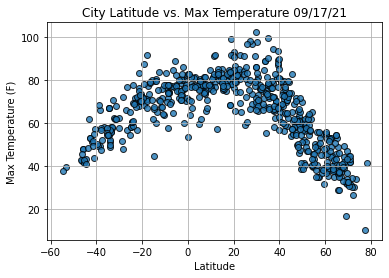

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

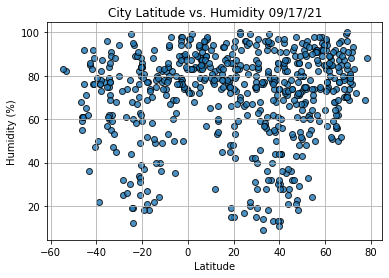

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

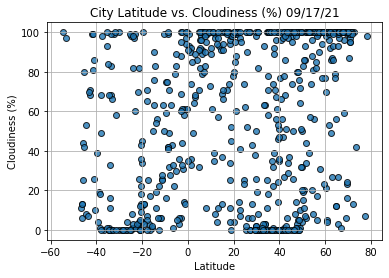

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

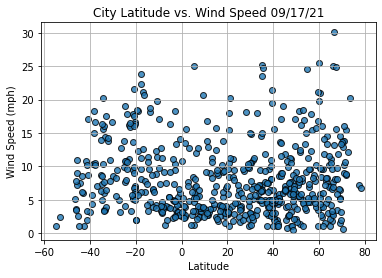

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()